<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Easy-OCR" data-toc-modified-id="Easy-OCR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Easy OCR</a></span></li><li><span><a href="#Easy-OCR-improve" data-toc-modified-id="Easy-OCR-improve-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Easy OCR improve</a></span></li><li><span><a href="#KerasOCR" data-toc-modified-id="KerasOCR-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KerasOCR</a></span></li><li><span><a href="#PaddleOCR" data-toc-modified-id="PaddleOCR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PaddleOCR</a></span></li><li><span><a href="#Pytesseract" data-toc-modified-id="Pytesseract-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pytesseract</a></span></li></ul></div>

pip install easyocr --user

pip install keras-ocr

pip install editdistance

Easy OCR - works but not upto my expectation

## Easy OCR

In [8]:
import easyocr
import pandas as pd
import glob

In [9]:
reader = easyocr.Reader(['en'], gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\rishi\AppData\Roaming\Python\Python39\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on Gi

In [10]:
img = glob.glob('receipt_image.jpg')
 
for i, image in enumerate(img):
    print("here")
    results = reader.readtext(
        image,
        # Paragraph is needed to get text grouped together
        paragraph=True,
        # X_threshold is needed to get text grouped together
        # For example, address fields with high X_threshold will be grouped together
        # and will be returned as one text. This is not the desired outcome.
        # Lowering the X_threshold will return the address fields as separate text, which is also bad!
        # PS. Play around with the X_threshold to see the results.
        x_ths=0.1)
df = pd.DataFrame(results, columns=['bbox', 'text'])
print(df.head())

here


AttributeError: module 'PIL.Image' has no attribute 'Resampling'

In [37]:
print(df["text"][1])

Potato Sweet Gold 0.632 kg NET @ 64.))/kg Mandar in Amorette Saeclless 0os : 0..222 kg NET @ 64.9)/kg #Woolvorths Art 8ag Kiwitruit Gold Imp P/F 5)Jg Ber tocchi Australian)t Sn<d Ham off Bore #Arnotts Salada (rigina] 250] Inghams Turkey Brst Hal f Jvan Roast Kg Don  Shredded Ham KG Dorsogna Streak} Bacon kg #S/Pots Macadamia Rst/salt 120g


In [38]:
img = glob.glob('receipt_image 2.jpg')
 
for i, image in enumerate(img):
    print("here")
    results = reader.readtext(
        image,
        # Paragraph is needed to get text grouped together
        paragraph=True,
        # X_threshold is needed to get text grouped together
        # For example, address fields with high X_threshold will be grouped together
        # and will be returned as one text. This is not the desired outcome.
        # Lowering the X_threshold will return the address fields as separate text, which is also bad!
        # PS. Play around with the X_threshold to see the results.
        x_ths=0.3)
df2 = pd.DataFrame(results, columns=['bbox', 'text'])
print(df2.head())

here
                                           bbox  \
0    [[156, 3], [231, 3], [231, 29], [156, 29]]   
1      [[74, 10], [96, 10], [96, 18], [74, 18]]   
2  [[100, 10], [152, 10], [152, 26], [100, 26]]   
3  [[100, 40], [173, 40], [173, 78], [100, 78]]   
4  [[55, 87], [251, 87], [251, 161], [55, 161]]   

                                                text  
0                               M Ltu Htrale 109 709  
1                                               Cole  
2                                 Srenuiket Jonyolci  
3     ColesGiING REDKITE HELPING HAND Curlet Auequte  
4  Store; 0671 Oren 6ur tIIlJar slofe Funader hez...  


In [48]:
df2["bbox"][5]

[[49, 167], [207, 167], [207, 411], [49, 411]]

In [49]:
df["bbox"][1]

[[108, 244], [482, 244], [482, 546], [108, 546]]

In [39]:
df2["text"][5]

'MhITe ChCC Sa1Ce TeAcH SALCe ChravEL DIP ijugRah DIFPIN; SAUCE Any FCR {J \'COLES COOKED HUSSFI S sulorak JcT4uiSi Pias PFRN] COLES ItaIAa Salad Iscgram Nar BANANA 600 - :60 CIOHL Hus-ponys EXOTIC:GOU IOCGRAM ESPRESSO "ILF WooHL 4B1G LIMII EDT MilK 6o0mL DL PanTALICA_Cheese FERKG BERRY 1233341 KacRD MEn RANGARod PEFG d/l FRIkO BAcD Kidd PER4G HonsBal DRESSIA; I25HL RASPBERRIES I23CRAk LAHSUNS TRLDITICKA_ BOOGRAH MATURAL MAcAOAmIAS FerKG 047 KoHET #k 49 kotts TIH Ta4 BISC Eucram Quant Itye 51.69 eacn XC 1/2 Fak HT ChIcreM IeachH'

In [41]:
img = glob.glob('receipt_image 2 cropped.jpg')
 
for i, image in enumerate(img):
    print("here")
    results = reader.readtext(
        image,
        # Paragraph is needed to get text grouped together
        paragraph=True,
        # X_threshold is needed to get text grouped together
        # For example, address fields with high X_threshold will be grouped together
        # and will be returned as one text. This is not the desired outcome.
        # Lowering the X_threshold will return the address fields as separate text, which is also bad!
        # PS. Play around with the X_threshold to see the results.
        x_ths=0.3)
df3 = pd.DataFrame(results, columns=['bbox', 'text'])
print(df3.head())

here
                                       bbox  \
0  [[5, 5], [165, 5], [165, 246], [5, 246]]   

                                                text  
0  U CHCC S4LCE SALCE Chra"EL IJUGRAH di-pIn; SAU...  


In [42]:
df3["text"][0]

'U CHCC S4LCE SALCE Chra"EL IJUGRAH di-pIn; SAUCE ANY \'COLES COCKED HIESFL sulgra" @L JI-4 MesT Praik3 ReRNG COLES ITAlIAR 842 SCGRam Ivar BANANR gooyl#Ecq coohl hus-rulys EXOTIC:GDl IOCCRAY Eaps Eapressi soo4L ivT MILK 600mL D/L PANTALICA Checse FERKC BERRY 1235R4 aCRD Mint Ka carod PERG FRINO Bacon MIdD PER4G Knkrr DRESSIN: I25hL RASPBERRIES I23CRAk LAHSUNS  TRADITICKAL JOOGRAH MATuRAL MacadamIAS FERKG 047 *0_NET {.3/kd XakoITS Tay BISC Euiram Quant Ity 59 e2cn Xc 1/2 Fah Ht CHIcKEN IEacH'

## Easy OCR improve

## KerasOCR

In [22]:
import keras_ocr
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
img = glob.glob('receipt_image.jpg')
 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\rishi\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\rishi\.keras-ocr\crnn_kurapan.h5


5/5 [==============================] - 7s 1s/step
         text                                               bbox
0  woolworths  [[209.38231, 45.877274], [454.63773, 41.160812...
1         the  [[245.2859, 90.14855], [295.52554, 88.13897], ...
2       fresh  [[296.0, 91.0], [353.0, 91.0], [353.0, 125.0],...
3        food  [[355.0, 93.0], [405.0, 93.0], [405.0, 125.0],...
4      pesple  [[398.89188, 101.35135], [465.05405, 90.32431]...


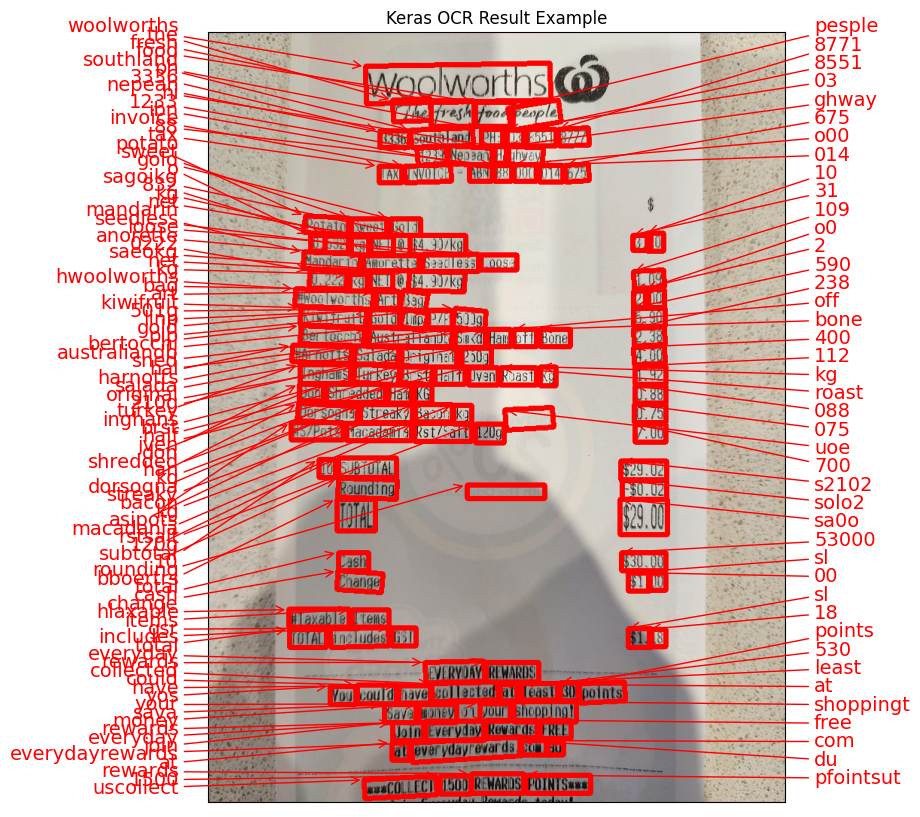

In [98]:

results = pipeline.recognize(
    [img[0]],
    # Uncomment the next lines to see messier results
     detection_kwargs={
        'detection_threshold': 0.9,
         'text_threshold': 0.3,
        'link_threshold': 0.1, #reducing this captures a big box
    #     'size_threshold': 1,
    },
)
 
df = pd.DataFrame(results[0], columns=['text', 'bbox'])
pd.set_option('display.max_columns', None)  # To display all columns
print(df.head())
 
# Code to display image with bounding boxes
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img[0]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

In [108]:
words = df['text'].tolist()
sentence = ' '.join(words)

In [109]:
sentence

'woolworths the fresh food pesple 8771 southland ph 8551 03 3336 nepean hi 1233 ghway ibn o00 675 invoice 88 014 tax potato sweet gold 10 o sagoikg 31 832 kg net mandarin seedless loose anorette 0222 109 net saeokg kg hwoolworths o0 2 art bag kiwifruit 590 gold 501g linp pip bertocchi 238 australiandb sned hal off bone harnotts salada 400 original 210g inghans turkey brst 112 half kg jven roast don shredded han kg 088 dorsogna streaky bacon 075 kg uoe asipots macadania rstsalt 120g 700 subtotal 10 s2102 rounding solo2 bboertrs total sa0o cash 53000 change sl 00 hlaxable items gsr includes sl total 18 everyday rewards collected 530 least points at could have yos shoppingt your sava money rewards free everyday join everydayrewards com du at rewards pfointsut 1500 uscollect'

In [113]:
import numpy as np

In [115]:
# Calculate the y-center of each bounding box (average of the top and bottom y values)
df['y_center'] = df['bbox'].apply(lambda x: np.mean([x[0][1], x[2][1]]))

# Sort by y-center
df = df.sort_values(by='y_center')

# Group words that are close together on the y-axis
lines = []
current_line = []
y_threshold = 10  # Adjust this value based on the font size and spacing in your image

for i, row in df.iterrows():
    if not current_line:
        current_line.append(row)
    else:
        last_word_y = current_line[-1]['y_center']
        if abs(row['y_center'] - last_word_y) < y_threshold:
            current_line.append(row)
        else:
            lines.append(current_line)
            current_line = [row]

if current_line:
    lines.append(current_line)

# Combine words in each line
grouped_lines = [' '.join([word['text'] for word in line]) for line in lines]

# Print grouped lines
for line in grouped_lines:
    print(line)

woolworths
the fresh food pesple
8771 ph 8551 03 southland 3336
hi 1233 nepean ghway
ibn o00 675 88 014 invoice tax
potato sweet gold
10 31 o 832 sagoikg net kg
mandarin loose seedless anorette
109 0222 net saeokg kg
o0 hwoolworths 2 art bag
590 kiwifruit gold pip 501g linp
bertocchi 238 australiandb hal off bone sned
harnotts 400 salada original 210g
inghans turkey 112 brst half kg jven roast
don shredded han kg 088
bacon streaky 075 dorsogna kg uoe
asipots macadania rstsalt 700 120g
subtotal 10 s2102
rounding solo2 bboertrs
total sa0o
cash 53000
00 sl change
items hlaxable
gsr includes sl 18 total
rewards everyday
530 least collected at points have could yos
shoppingt your sava money
rewards free everyday join
com du everydayrewards at
rewards pfointsut 1500 uscollect


In [117]:
grouped_lines

['woolworths',
 'the fresh food pesple',
 '8771 ph 8551 03 southland 3336',
 'hi 1233 nepean ghway',
 'ibn o00 675 88 014 invoice tax',
 'potato sweet gold',
 '10 31 o 832 sagoikg net kg',
 'mandarin loose seedless anorette',
 '109 0222 net saeokg kg',
 'o0 hwoolworths 2 art bag',
 '590 kiwifruit gold pip 501g linp',
 'bertocchi 238 australiandb hal off bone sned',
 'harnotts 400 salada original 210g',
 'inghans turkey 112 brst half kg jven roast',
 'don shredded han kg 088',
 'bacon streaky 075 dorsogna kg uoe',
 'asipots macadania rstsalt 700 120g',
 'subtotal 10 s2102',
 'rounding solo2 bboertrs',
 'total sa0o',
 'cash 53000',
 '00 sl change',
 'items hlaxable',
 'gsr includes sl 18 total',
 'rewards everyday',
 '530 least collected at points have could yos',
 'shoppingt your sava money',
 'rewards free everyday join',
 'com du everydayrewards at',
 'rewards pfointsut 1500 uscollect']

## PaddleOCR

In [7]:
from paddleocr import PaddleOCR
import csv

ModuleNotFoundError: No module named 'paddle'

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, det_model_dir= <weight_file_dir>, rec_model_dir= <weight_file_dir>, cls_model_dir= <weight_file_dir>, use_space_char=True, use_gpu=True)
result = ocr.ocr(<img_path>, cls=True)

with open(<csv_file_path>, 'w', newline='') as file:
    writer = csv.writer(file)
    for row in result:
        csv_row= []
        for row0 in row[0]:
            csv_row.append(row0[0])
            csv_row.append(row0[1])
        csv_row.append(row[1][0])
        writer.writerow(csv_row)

In [106]:
def isOnSameLine(boxOne, boxTwo):
    boxOneStartY = boxOne[0,1]
    boxOneEndY = boxOne[2,1]
    boxTwoStartY = boxTwo[0,1]
    boxTwoEndY = boxTwo[2,1]
    if((boxTwoStartY <= boxOneEndY and boxTwoStartY >= boxOneStartY)
    or(boxTwoEndY <= boxOneEndY and boxTwoEndY >= boxOneStartY)
    or(boxTwoEndY >= boxOneEndY and boxTwoStartY <= boxOneStartY)):
        return True
    else:
        return False

In [ ]:
# list of indexes
temp = []
i = 0

# TODO: check if there is more than one box_group
while i < len(box_group):
    for j in range(i + 1, len(box_group)):
        if(isOnSameLine(box_group[i],box_group[j])):
            print(str(i) + " and " + str(j) + " on same line")
            if i not in temp:
                temp.append(i)
            if j not in temp:
                temp.append(j)
        else:
            print(str(i) + " and " + str(j) + " not on same line")
        # append temp with i if the current box (i) is not on the same line with any other box
        if len(temp) == 0:
            temp.append(i)

    # put boxes on same line into lined_box_group array
    lined_box_group = box_group[np.array(temp)]
    # sort boxes by startX value
    lined_box_group = lined_box_group[np.argsort(lined_box_group[:, 0, 0])]
    # copy sorted boxes on same line into sorted_box_group
    sorted_box_group[i:temp[-1]+1] = lined_box_group

    # skip to the index of the box that is not on the same line
    i = temp[-1] + 1
    # clear list of indexes
    temp = []

## Pytesseract

In [ ]:
#to do:
#improve the image
#whiter background and darker letters - saturation
#what processing should be done to better read text

In [7]:
import requests

print("=== Python Receipt OCR Demo - Need help? Email support@asprise.com ===")

receiptOcrEndpoint = 'https://ocr.asprise.com/api/v1/receipt' # Receipt OCR API endpoint
imageFile = "receipt.jpg" # // Modify this to use your own file if necessary
r = requests.post(receiptOcrEndpoint, data = { \
  'client_id': 'TEST',        # Use 'TEST' for testing purpose \
  'recognizer': 'auto',       # can be 'US', 'CA', 'JP', 'SG' or 'auto' \
  'ref_no': 'ocr_python_123', # optional caller provided ref code \
  }, \
  files = {"file": open('receipt_image.jpg', "rb")})

print(r.text) # result in JSON

=== Python Receipt OCR Demo - Need help? Email support@asprise.com ===
{
  "ref_no" : "ocr_python_123",
  "success" : false,
  "message" : "Hourly quota exceeded. Try again in a few hours or contact us to increase the quota: ocr@asprise.com",
  "get_help" : "Please contact support@asprise.com for assistance."
}


In [129]:
import json
data = json.loads(r.text)

items = data['receipts'][0]['items']
item_list = []
for item in items:
    item_list.append(item['description'])

In [140]:
item_list

In [147]:
import requests

print("=== Python Receipt OCR Demo - Need help? Email support@asprise.com ===")

receiptOcrEndpoint = 'https://ocr.asprise.com/api/v1/receipt' # Receipt OCR API endpoint
imageFile = "receipt.jpg" # // Modify this to use your own file if necessary
r = requests.post(receiptOcrEndpoint, data = { \
  'client_id': 'TEST',        # Use 'TEST' for testing purpose \
  'recognizer': 'auto',       # can be 'US', 'CA', 'JP', 'SG' or 'auto' \
  'ref_no': 'ocr_python_123', # optional caller provided ref code \
  }, \
  files = {"file": open('receipt_image 2.jpg', "rb")})

print(r.text) # result in JSON

=== Python Receipt OCR Demo - Need help? Email support@asprise.com ===
{
  "ocr_type" : "receipts",
  "request_id" : "P_149.167.21.104_m06sobq5_6sz",
  "ref_no" : "ocr_python_123",
  "file_name" : "receipt_image 2.jpg",
  "request_received_on" : 1724422571357,
  "success" : true,
  "image_width" : 288,
  "image_height" : 512,
  "image_rotation" : -0.009,
  "recognition_completed_on" : 1724422571721,
  "receipts" : [ {
    "merchant_name" : "Open 6am till 1am",
    "merchant_address" : null,
    "merchant_phone" : "+61 3 9654 3830",
    "merchant_website" : null,
    "merchant_tax_reg_no" : null,
    "merchant_company_reg_no" : null,
    "region" : null,
    "mall" : null,
    "country" : "AU",
    "receipt_no" : "2342",
    "date" : "2013-03-18",
    "time" : null,
    "items" : [ {
      "amount" : 2.00,
      "category" : null,
      "description" : "Reg 3 Served By: Keerthi 304",
      "flags" : "",
      "qty" : null,
      "remarks" : null,
      "tags" : null,
      "unitPrice" :

In [148]:
import json
data = json.loads(r.text)

items = data['receipts'][0]['items']
item_list = []
for item in items:
    item_list.append(item['description'])

In [149]:
item_list

['Reg 3 Served By: Keerthi 304',
 'SAUCE CARAMEL DIP 130GRAM',
 'DIPPING SAUCE ANY 2 FOR$3',
 'COLES COOKED MUSSELS 500GRAM',
 'D/L JOHN WEST PRAWNS PERKG',
 'COLES ITALIAN SALAD 150GRAM',
 'XOAK BANANA 600ML: 600 600ML',
 'MUSHROOMS EXOTIC: GOU 100GRAM',
 'XDARE ESPRESSO MILK 500ML',
 'XBIG M LIMIT EDT MILK 600ML',
 'D/L PANTALICA CHEESE PERKG',
 'KIWI BERRY 125GRAM',
 'MACRO MEATS KANGAROO PERKG',
 'D/L PRIMO BACON MIDD PERKG',
 'HON & BAL DRESSING 125ML',
 'RASPBERRIES 125GRAM',
 'LAWSONS TRADITIONAL 800GRAM',
 'NATURAL MACADAMIAS PERKG',
 'XARNOTTS TIM TAM BISC 90GRAM',
 '1/2 FAM HT CHICKEN 1EACH']

In [ ]:
try:
    code
except:
    return [e]

In [ ]:
#upload only single image at a time
#upload second